# Imports

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os 
import shap
import pickle
import seaborn as sns

from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC


# Load data

In [98]:
employee= pd.read_csv('C:/py/data/attrition/employee_process.csv')
y=employee['y']
X=employee.drop(columns=['y'])
X = X[['age','environmentsatisfaction','jobinvolvement','joblevel','jobsatisfaction','numcompaniesworked','overtime',
     'yearsincurrentrole','yearssincelastpromotion','businesstravel_travel_frequently','department_human_resources',
     'department_research_development','jobrole_human_resources','jobrole_laboratory_technician','maritalstatus_divorced']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [99]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [100]:
svc = SVC(kernel = 'sigmoid',
           C = 0.1,
           gamma = 0.01,
           random_state = 0, probability = True).fit(X_train, y_train)

In [66]:
svm_model = pickle.load(open('attrition_svm.pkl', 'rb'))

In [101]:
svm_explainer = shap.KernelExplainer(svc.predict_proba,shap.kmeans(X_train,250))
#svm_explainer = shap.KernelExplainer(svm_model.predict_proba,X_train)

X does not have valid feature names, but SVC was fitted with feature names
Using 250 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


array([[ 18.        , 102.        ,   1.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 18.        , 102.        ,   1.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 18.00907098, 103.75907034,   1.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [ 18.        , 102.        ,   1.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 18.        , 102.        ,   1.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 18.        , 102.        ,   1.        , ...,   0.        ,
          0.        ,   0.        ]])

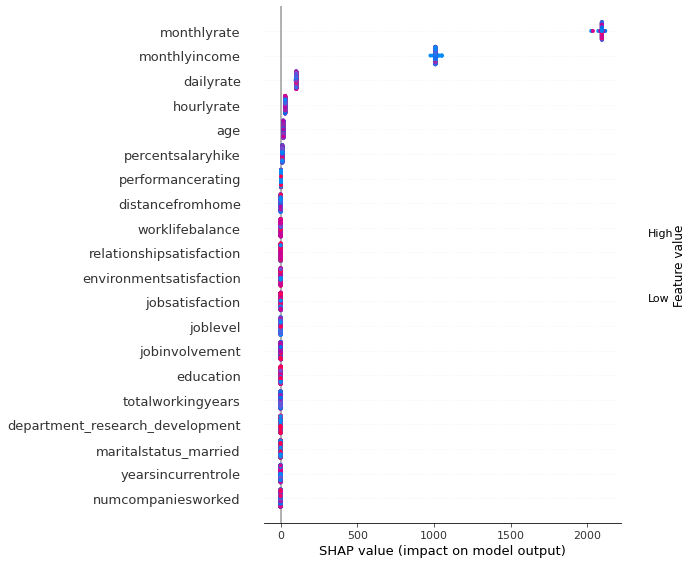

In [75]:
shap.summary_plot(scaler.inverse_transform(shap_values[1]),X_test.astype("float"))

In [46]:
features = X.columns

In [77]:
sv = np.array(shap_values)
y = svm_model.predict(X_test).astype("bool")
# shap values for attrition
sv_att = sv[:,y,:]
# shap values for stay
sv_stay = sv[:,~y,:]

In [78]:
idx = np.abs(sv[1,:,:]).mean(0).argsort()
features[idx[:-4:-1]]

Index(['monthlyincome', 'dailyrate', 'monthlyrate'], dtype='object')

## What makes people leave

In [88]:
idx = sv[1,y,:].mean(0).argsort()
features[idx[:-4:-1]]

Index(['maritalstatus_single', 'yearssincelastpromotion', 'yearsatcompany'], dtype='object')

## What makes people stay

In [80]:
idx = sv[0,~y,:].mean(0).argsort()
features[idx[:3]]

Index(['monthlyincome', 'age', 'totalworkingyears'], dtype='object')

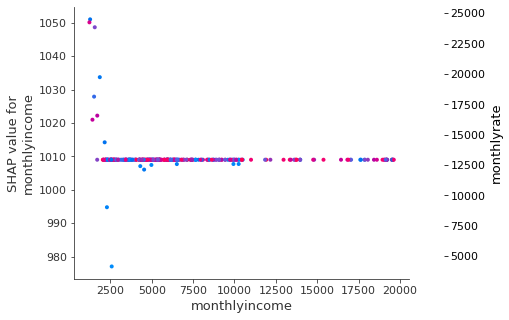

In [84]:
shap.dependence_plot("monthlyincome", scaler.inverse_transform(shap_values[1]), X_test)

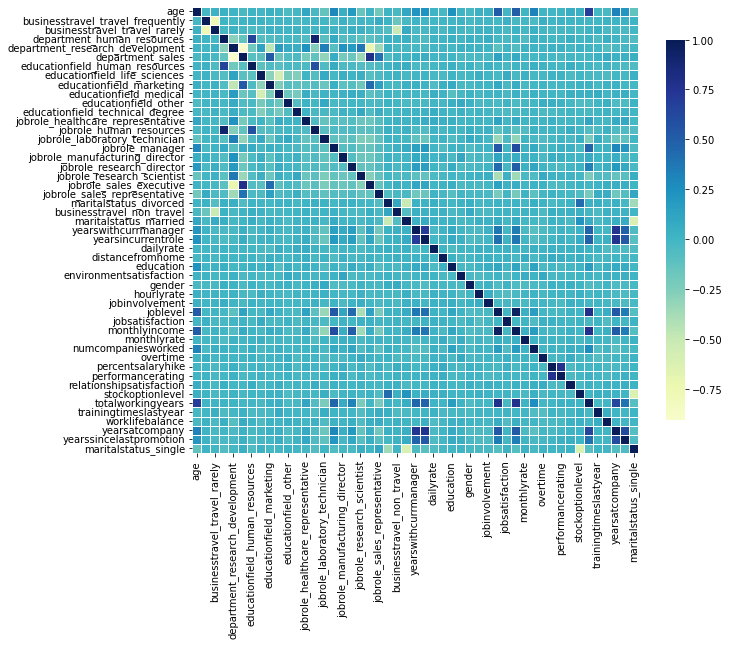

In [90]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=False, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(X_train[X.columns[idx]])


In [102]:
shap_values = svm_explainer.shap_values(X_test)

  0%|          | 0/294 [00:00<?, ?it/s]

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



KeyboardInterrupt: 

IndexError: tuple index out of range